In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


In [7]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [8]:
df.drop(['Name'],axis = 'columns',inplace=True)
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


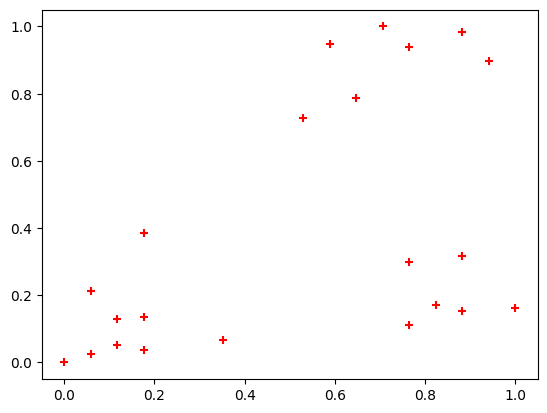

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'],marker= '+',color='red')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
scaler.fit_transform(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df


,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


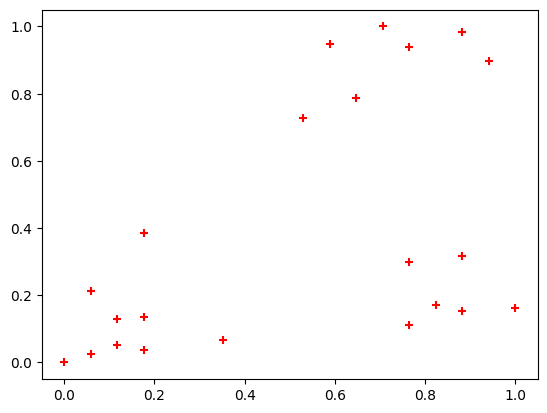

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'],marker= '+',color='red')

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [14]:
df['cluster'] = y_predicted
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


Text(0, 0.5, 'Income($)')

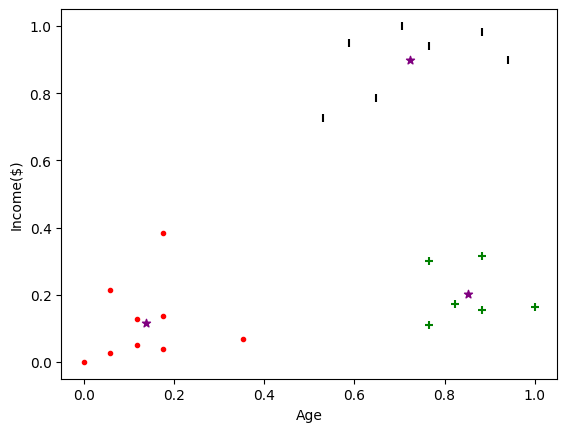

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df1['Age'],df1['Income($)'],color='green',marker='+')
plt.scatter(df2['Age'],df2['Income($)'],color='red',marker='.')
plt.scatter(df3['Age'],df3['Income($)'],color='black',marker='|')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [35]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Now, Inorder to find the optimal number of K we use Elbow method

In [41]:
k_no =12
sse = []
for k in range (1,k_no):
    km = KMeans(n_clusters = k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [42]:
sse

[5.434011511988178,
 2.3456144914725936,
 0.4750783498553096,
 0.3491047094419566,
 0.2798062931046179,
 0.24387536901677193,
 0.19429256406898146,
 0.13265419827245162,
 0.11490780678851838,
 0.08191902286777042,
 0.08642376585549326]

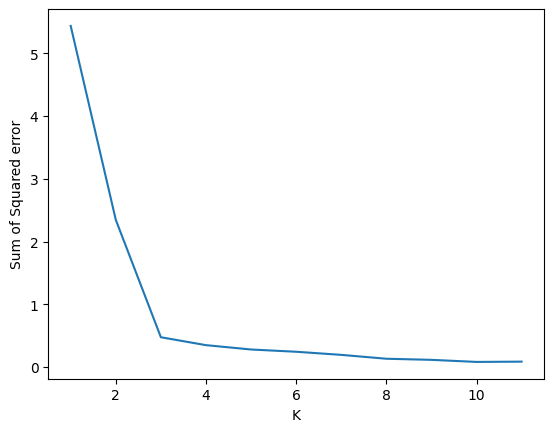

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
plt.plot(range(1,k_no),sse)

THE ELBOW PART IN THE GRAPH IS AT 3 SO THE OPTIMAL VALUE OF K IS 3